In [141]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
df_train = pd.read_csv('House_sales_train.csv')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [143]:
df_test = pd.read_csv('House_prices_test.csv')
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [144]:
test_id = df_test.Id

In [140]:
df_train.shape

(1460, 72)

In [5]:
df_test.shape

(1459, 80)

In [96]:
y = df_train.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
df_all = pd.concat((df_test, df_train)).reset_index(drop=True)

In [7]:
df_all.drop('SalePrice', axis=1, inplace=True)
df_all.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


# Категориальные фичи

In [8]:
categorical_features = [feature for feature in df_all.columns 
                        if df_all[feature].dtype == 'O']

print(f'Number of categorical variables: {len(categorical_features)}')

df_train[categorical_features].head(3)

Number of categorical variables: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
categorical_with_nan = [feature for feature in df_all[categorical_features]
                       if df_all[feature].isnull().any()]

In [10]:
len(categorical_with_nan)

23

In [11]:
for feature in categorical_with_nan:
    print(f'{feature}: \t {np.around(df_all[feature].isnull().mean()*100, 2)}%  missing value')

MSZoning: 	 0.14%  missing value
Alley: 	 93.22%  missing value
Utilities: 	 0.07%  missing value
Exterior1st: 	 0.03%  missing value
Exterior2nd: 	 0.03%  missing value
MasVnrType: 	 0.82%  missing value
BsmtQual: 	 2.77%  missing value
BsmtCond: 	 2.81%  missing value
BsmtExposure: 	 2.81%  missing value
BsmtFinType1: 	 2.71%  missing value
BsmtFinType2: 	 2.74%  missing value
Electrical: 	 0.03%  missing value
KitchenQual: 	 0.03%  missing value
Functional: 	 0.07%  missing value
FireplaceQu: 	 48.65%  missing value
GarageType: 	 5.38%  missing value
GarageFinish: 	 5.45%  missing value
GarageQual: 	 5.45%  missing value
GarageCond: 	 5.45%  missing value
PoolQC: 	 99.66%  missing value
Fence: 	 80.44%  missing value
MiscFeature: 	 96.4%  missing value
SaleType: 	 0.03%  missing value


# Числовые фичи

In [12]:
numerical_features = [feature for feature in df_all.columns 
                      if df_all[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))

df_all[numerical_features].head(3)

Number of numerical features:  37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [13]:
numerical_with_nan = [feature for feature in df_all[numerical_features] 
                      if df_all[feature].isnull().sum()
                      and df_all[feature].dtypes != 'O']

numerical_with_nan

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [14]:
for feature in numerical_with_nan:
    print(f'{feature}: \t {np.around(df_all[feature].isnull().mean()*100, 2)}% missing value')

LotFrontage: 	 16.65% missing value
MasVnrArea: 	 0.79% missing value
BsmtFinSF1: 	 0.03% missing value
BsmtFinSF2: 	 0.03% missing value
BsmtUnfSF: 	 0.03% missing value
TotalBsmtSF: 	 0.03% missing value
BsmtFullBath: 	 0.07% missing value
BsmtHalfBath: 	 0.07% missing value
GarageYrBlt: 	 5.45% missing value
GarageCars: 	 0.03% missing value
GarageArea: 	 0.03% missing value


## Дискретные значения:

In [15]:
discrete_features = [feature for feature in numerical_features 
                    if len(df_all[feature].unique())<25 
                    and feature not in ['Id']]

print('Discrete Feature Count: ', len(discrete_features))

df_all[discrete_features].head(3)

Discrete Feature Count:  15


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,20,5,6,0.0,0.0,1,0,2,1,5,0,1.0,0,6,2010
1,20,6,6,0.0,0.0,1,1,3,1,6,0,1.0,0,6,2010
2,60,5,5,0.0,0.0,2,1,3,1,6,1,2.0,0,3,2010


## Непрерывные значения:

In [16]:
continuous_features = [feature for feature in numerical_features 
                      if feature not in discrete_features + ['Id']]

print(f'Continuous Features Count:  {len(continuous_features)}')

df_all[continuous_features].head(3)

Continuous Features Count:  21


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,0,896,1961.0,730.0,140,0,0,0,120,0
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,0,1329,1958.0,312.0,393,36,0,0,0,12500
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,0,1629,1997.0,482.0,212,34,0,0,0,0


## Посмотрим на распределения непрерывных величин

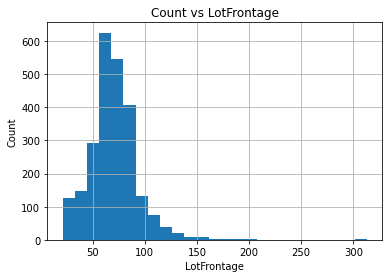

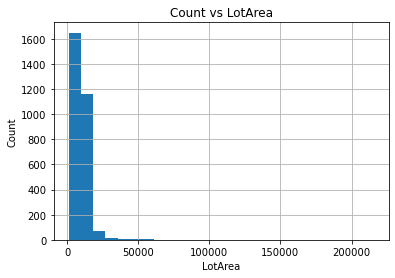

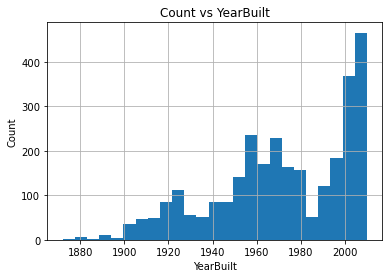

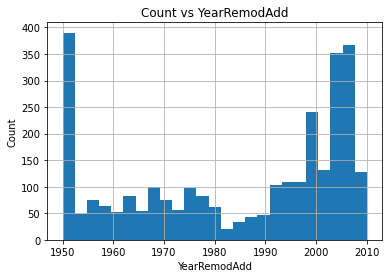

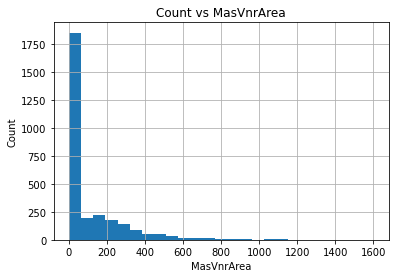

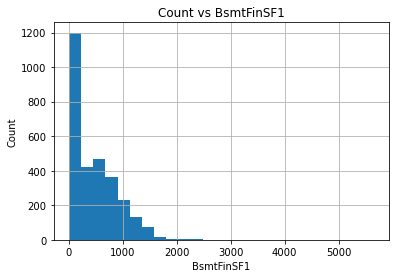

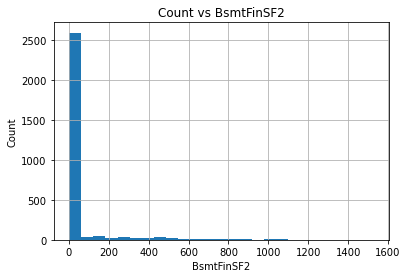

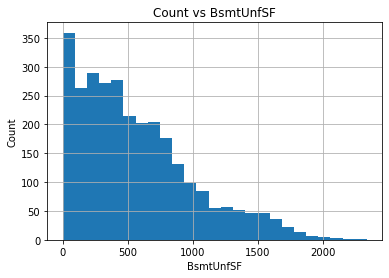

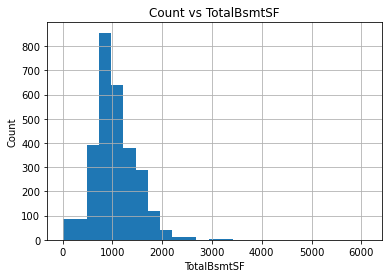

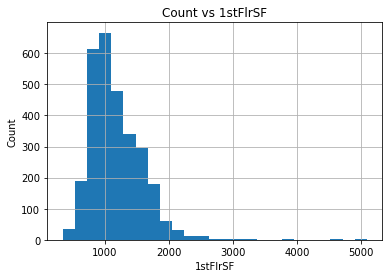

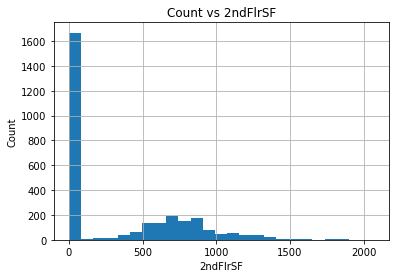

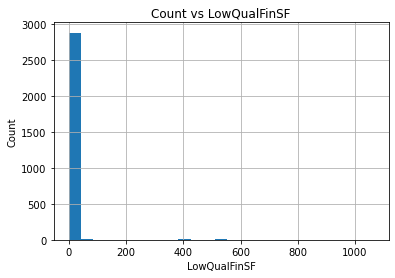

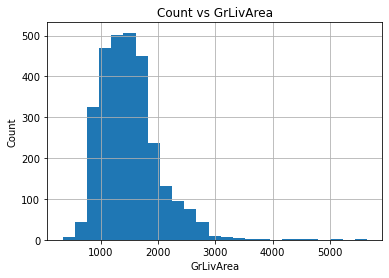

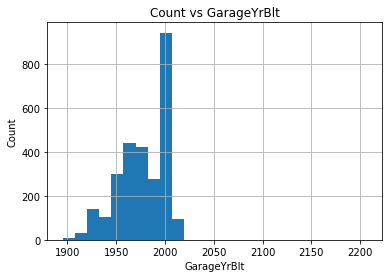

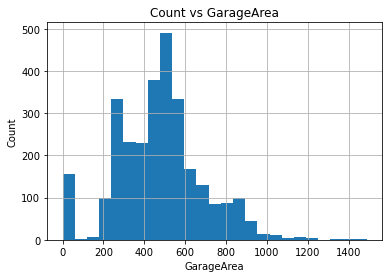

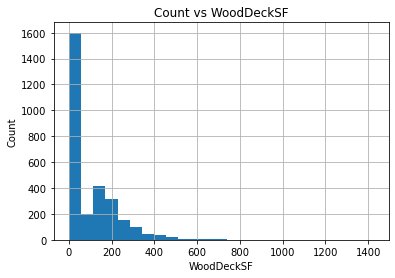

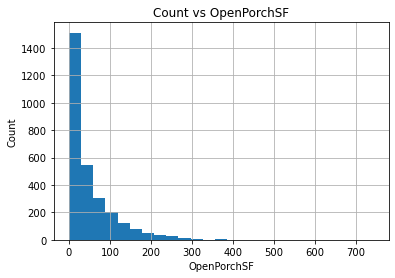

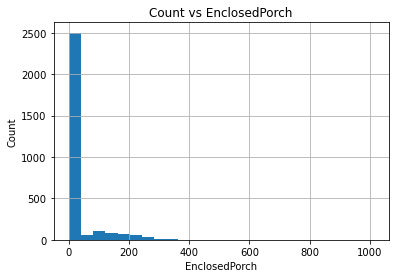

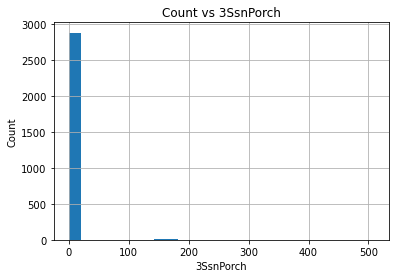

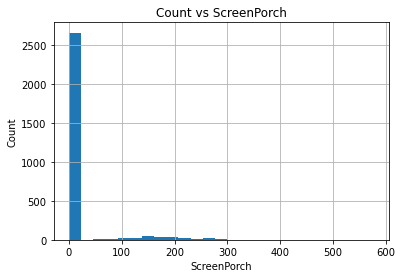

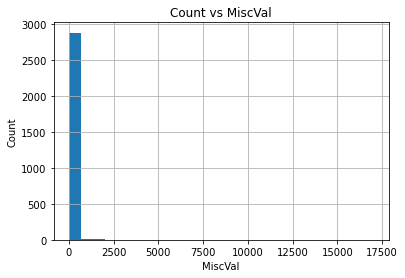

In [17]:
for feature in continuous_features:
    df_all = df_all.copy()
    df_all[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Count vs ' + feature)
    plt.show()

# Отбор фич

In [18]:
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(missing_data)

In [19]:
display_only_missing(df_train)

              Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageYrBlt        5.547945
GarageType         5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493


In [20]:
df_train.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [21]:
df_train.drop("PoolQC", axis=1, inplace=True)
df_test.drop("PoolQC", axis=1, inplace=True)

In [22]:
df_train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [23]:
df_train.drop("MiscFeature", axis=1, inplace=True)
df_test.drop("MiscFeature", axis=1, inplace=True)

In [24]:
df_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [25]:
df_train.drop("Alley", axis=1, inplace=True)
df_test.drop("Alley", axis=1, inplace=True)

In [26]:
df_train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [27]:
df_train.drop("Fence", axis=1, inplace=True)
df_test.drop("Fence", axis=1, inplace=True)

In [28]:
df_train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

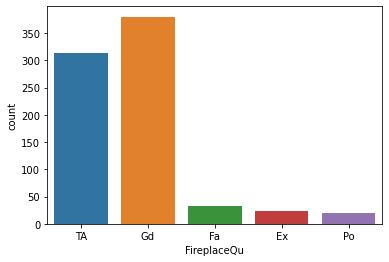

In [29]:
import seaborn as sns

sns.countplot(df_train["FireplaceQu"])

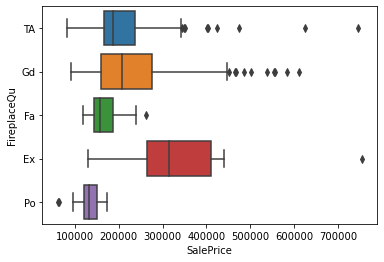

In [30]:
sns.boxplot(data=df_train, x="SalePrice", y="FireplaceQu")

In [31]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna(0)
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna(0)

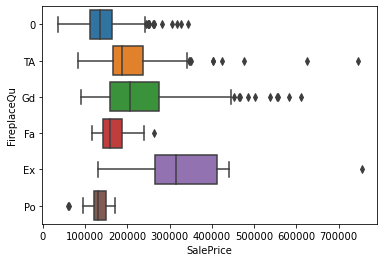

In [32]:
sns.boxplot(data=df_train, x="SalePrice", y="FireplaceQu")

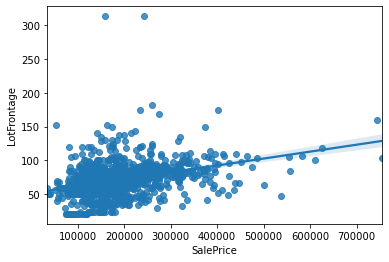

In [33]:
sns.regplot(data=df_train, x="SalePrice",y="LotFrontage")

In [34]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna( df_train["LotFrontage"].median())
df_test["LotFrontage"] = df_test["LotFrontage"].fillna( df_train["LotFrontage"].median())

In [35]:
df_train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

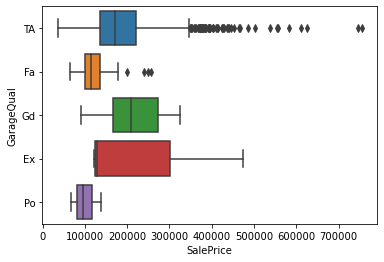

In [36]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageQual")

In [37]:
df_train.drop("GarageQual", axis=1, inplace=True)
df_test.drop("GarageQual", axis=1, inplace=True)

In [38]:
df_train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

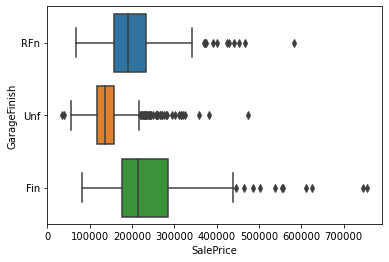

In [39]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageFinish")

In [40]:
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("NoGarage")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("NoGarage")

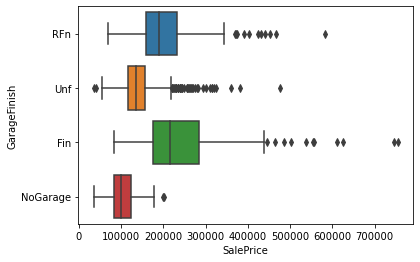

In [41]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageFinish")

In [42]:
df_train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [43]:
df_train["GarageCond"] = df_train["GarageCond"].fillna("NoGarage")

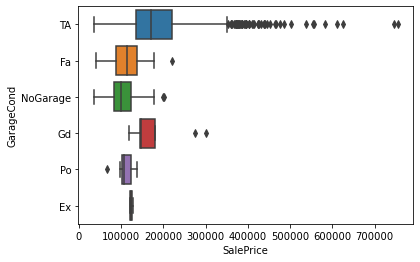

In [44]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageCond")

In [45]:
df_train.drop("GarageCond", axis=1, inplace=True)
df_test.drop("GarageCond", axis=1, inplace=True)

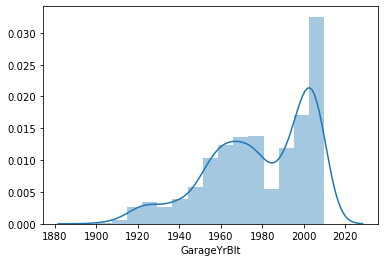

In [46]:
sns.distplot(df_train.GarageYrBlt)

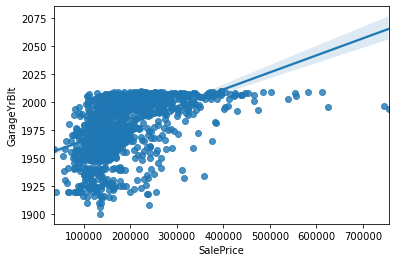

In [47]:
sns.regplot(data=df_train,x="SalePrice",y="GarageYrBlt")

In [48]:
#Заполним минимумом
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train.GarageYrBlt.min())
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(df_train.GarageYrBlt.min())

In [49]:
df_train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

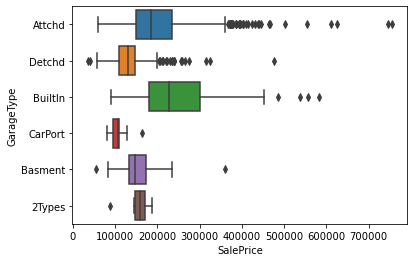

In [50]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageType")

In [51]:
df_train["GarageType"] = df_train["GarageType"].fillna("NoGarage")
df_test["GarageType"] = df_test["GarageType"].fillna("NoGarage")

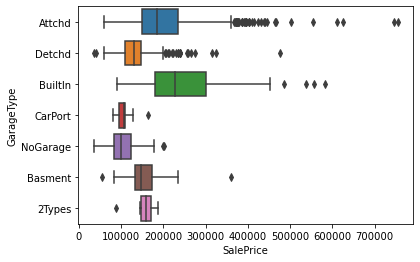

In [52]:
sns.boxplot(data=df_train, x="SalePrice", y="GarageType")

In [53]:
df_train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

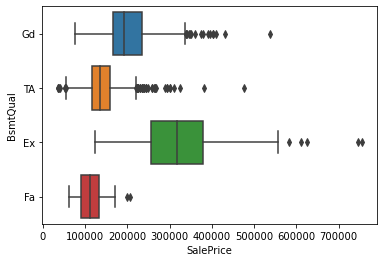

In [54]:
sns.boxplot(data=df_train, x="SalePrice", y="BsmtQual")

In [55]:
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("NoBsmt")
df_test["BsmtQual"] =df_test["BsmtQual"].fillna("NoBsmt")

In [56]:
df_train.drop("BsmtCond", axis=1, inplace=True)
df_test.drop("BsmtCond", axis=1, inplace=True)

In [57]:
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("NoBsmt")
df_test["BsmtExposure"] =df_test["BsmtExposure"].fillna("NoBsmt")

In [58]:
df_train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

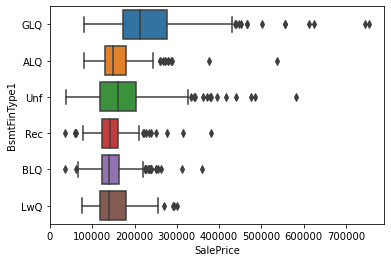

In [59]:
sns.boxplot(data=df_train, x="SalePrice", y="BsmtFinType1")

In [60]:
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("NoBsmt")
df_test["BsmtFinType1"] =df_test["BsmtFinType1"].fillna("NoBsmt")

In [61]:
df_train.drop("BsmtFinType2", axis=1, inplace=True)
df_test.drop("BsmtFinType2", axis=1, inplace=True)

In [62]:
df_train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

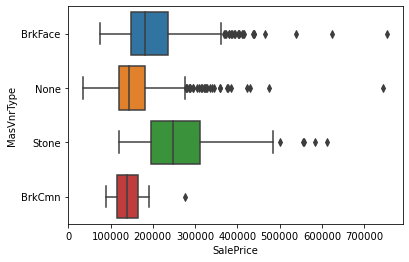

In [63]:
sns.boxplot(data=df_train, x="SalePrice", y="MasVnrType")

In [64]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_test["MasVnrType"] =df_test["MasVnrType"].fillna("None")

In [65]:
df_train["Electrical"] = df_train["Electrical"].fillna("SBrkr")
df_test["Electrical"] =df_test["Electrical"].fillna("SBrkr")

In [66]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

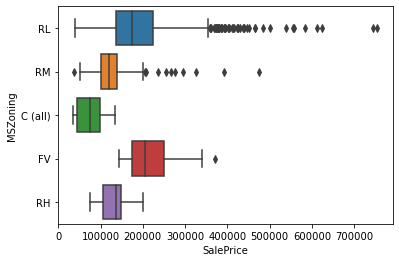

In [67]:
sns.boxplot(data=df_train, x="SalePrice", y="MSZoning")

In [68]:
df_train["MSZoning"] = df_train["MSZoning"].fillna("RL")
df_test["MSZoning"] = df_test["MSZoning"].fillna("RL")

In [69]:
df_test.Functional.value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [70]:
df_train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

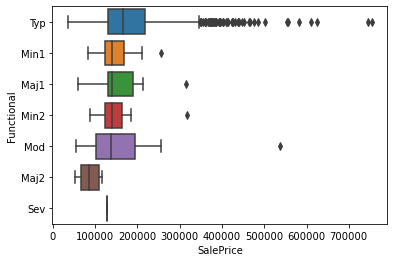

In [71]:
sns.boxplot(data=df_train, x="SalePrice", y="Functional")

In [72]:
df_test["Functional"] =df_test["Functional"].fillna("Typ")

In [73]:
df_train["Functional"].isnull().any()

False

In [74]:
df_test["BsmtFullBath"] =df_test["BsmtFullBath"].fillna(0)

In [75]:
df_test["BsmtHalfBath"] =df_test["BsmtHalfBath"].fillna(0)

In [76]:
df_test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [77]:
df_train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [78]:
df_test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [79]:
df_train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

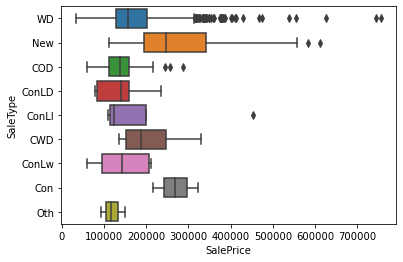

In [80]:
sns.boxplot(data=df_train, x="SalePrice", y="SaleType")

In [81]:
df_test["SaleType"] =df_test["SaleType"].fillna("WD")

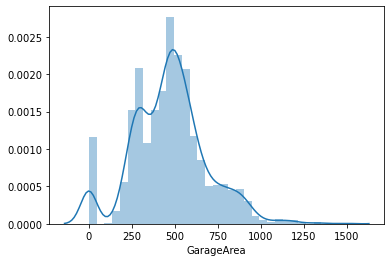

In [82]:
sns.distplot(df_test.GarageArea)

In [83]:
#Заполним минимумом.

df_test["GarageArea"] =df_test["GarageArea"].fillna(df_test.GarageArea.min())

In [84]:
df_test["GarageCars"] =df_test["GarageCars"].fillna(df_test.GarageCars.min())

In [85]:
df_test.KitchenQual.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [86]:
df_test["KitchenQual"] =df_test["KitchenQual"].fillna("TA")

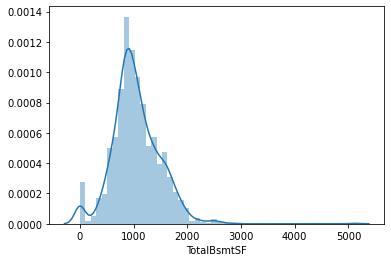

In [87]:
sns.distplot(df_test.TotalBsmtSF)

In [88]:
df_test["TotalBsmtSF"] =df_test["TotalBsmtSF"].fillna(df_test.TotalBsmtSF.min())

In [89]:
df_test["BsmtUnfSF"] =df_test["BsmtUnfSF"].fillna(df_test.BsmtUnfSF.min())

In [90]:
df_test["BsmtFinSF2"] =df_test["BsmtFinSF2"].fillna(df_test.BsmtFinSF2.min())

In [91]:
df_test["BsmtFinSF1"] =df_test["BsmtFinSF1"].fillna(df_test.BsmtFinSF1.min())

In [92]:
df_test["Exterior1st"] =df_test["Exterior1st"].fillna("VinlSd")

In [93]:
df_test["Exterior2nd"] =df_test["Exterior2nd"].fillna("VinlSd")

# Моделирование

In [111]:
df_train.columns[df_train.dtypes == "object"]

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [112]:
from sklearn.preprocessing import LabelEncoder
for col in df_train.columns[df_train.dtypes == "object"]:
    df_train[col] = df_train[col].factorize()[0]
df_train = df_train.drop(["Id"], axis=1)

In [128]:
for col in df_test.columns[df_test.dtypes == "object"]:
    df_test[col] = df_test[col].factorize()[0]

In [115]:
X = df_train.drop('SalePrice', axis=1)
X.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,65.0,8450,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,68.0,11250,0,1,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0


In [116]:
y = df_train.SalePrice

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33 ,random_state = 42)

In [119]:
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
random_grid={'learning_rate':[0.001,0.01],
            'max_depth':[10,30],
            'n_estimators':[200,300],
            'subsample':[0.5,0.7]
}
xgb = XGBRegressor(objective='reg:linear')
grid_search=GridSearchCV(estimator=xgb,param_grid = random_grid,cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')

In [120]:
grid_search.fit(X_train,y_train)
print("\nGrid Search Best parameters set :")
print(grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   18.7s finished


[14:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.

Grid Search Best parameters set :
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}


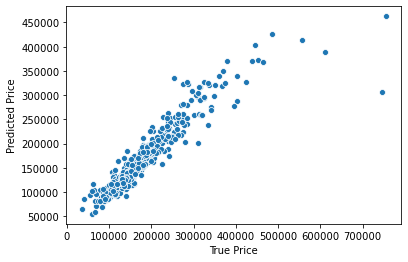

In [133]:
sns.scatterplot(y_test,pred)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [134]:
Test_predict=grid_search.predict(df_test)

In [135]:
prediction = pd.DataFrame(Test_predict, columns=['SalePrice'])